# **Task 1: House Price Prediction using Linear Regression**
<hr>

This notebook implements a simple linear regression model to predict house prices based on a few key features. The goal is to build, train, and evaluate a model using the Ames Housing dataset from Kaggle.

### **Libraries and Setup**
First, we import the necessary libraries for data manipulation, visualization, and machine learning.
- `pandas`: For loading and working with data.
- `matplotlib` and `seaborn`: For creating visualizations.
- `scikit-learn`: For building and evaluating the linear regression model.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### **Step 1: Data Loading**
We load the `train.csv` dataset. A `try-except` block is used to handle the case where the file is not found.

In [ ]:
try:
    df = pd.read_csv('/Users/harshmodi/PROGRAMMING/ML/PRODIGY ML INTERNSHIP/TASK-1/DATA/train.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please download it from the Kaggle link.")
    exit()

Dataset loaded successfully!


### **Step 2: Exploratory Data Analysis (EDA)**

#### **Initial Data Inspection**
We perform an initial inspection to understand its structure, check for missing values, and get summary statistics for our columns of interest. The `.info()` command confirms there are no missing values in our selected columns.

In [ ]:
print("\n--- First 5 Rows of the Dataset ---")
print(df.head())

# Select the columns we care about for this task
columns_of_interest = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'SalePrice']
df_selected = df[columns_of_interest]

print("\n--- Basic Information about Selected Columns ---")
df_selected.info()

print("\n--- Statistical Summary of Selected Columns ---")
print(df_selected.describe())


--- First 5 Rows of the Dataset ---
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleConditi

### Initial Inspection:

- The data loaded correctly.

- The .info() command shows that there are no missing values in our selected columns (GrLivArea, BedroomAbvGr, FullBath, SalePrice), which is great! This means we don't need to handle missing data for this specific task.



#### **Analyzing the Target Variable (`SalePrice`)**
We visualize the distribution of `SalePrice` to check for skewness and outliers. The histogram shows a right-skewed distribution, which is common for price-related data.

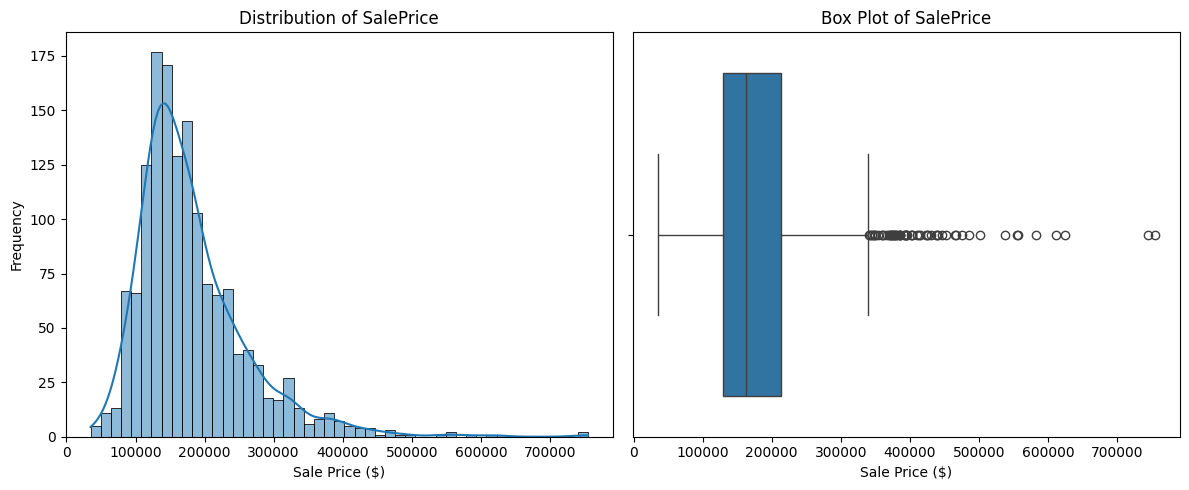

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram to see the distribution
plt.subplot(1, 2, 1)
sns.histplot(df_selected['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')

# Box plot to spot outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=df_selected['SalePrice'])
plt.title('Box Plot of SalePrice')
plt.xlabel('Sale Price ($)')

plt.tight_layout()
plt.show()


### SalePrice Distribution:

- The histogram of SalePrice is right-skewed, meaning there are more houses at the lower end of the price range and a few very expensive houses that form a "tail" to the right.

- This is very common for price data. For more advanced models, we might apply a log transformation to make the distribution more normal, but for a basic linear regression, we can proceed as is.

#### **Analyzing Feature Relationships**
We create scatter and box plots to understand the relationship between our chosen features and `SalePrice`.
- **`GrLivArea` vs. `SalePrice`**: Shows a strong positive linear relationship.
- **`BedroomAbvGr` vs. `SalePrice`**: Shows a positive but weaker relationship.

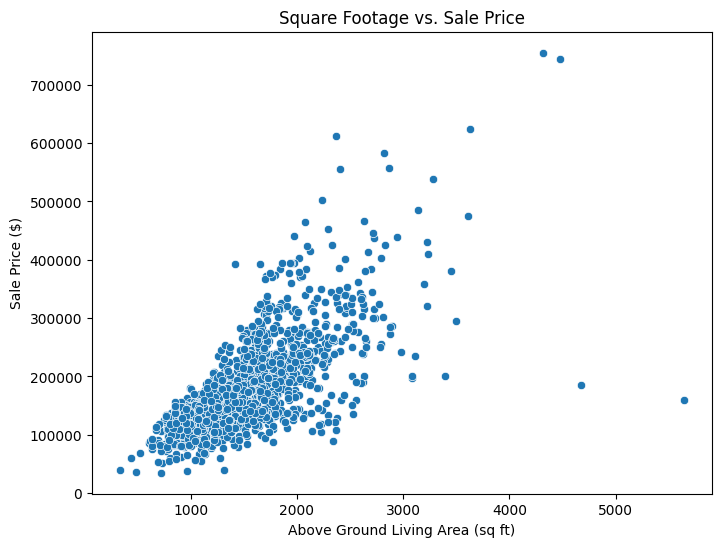

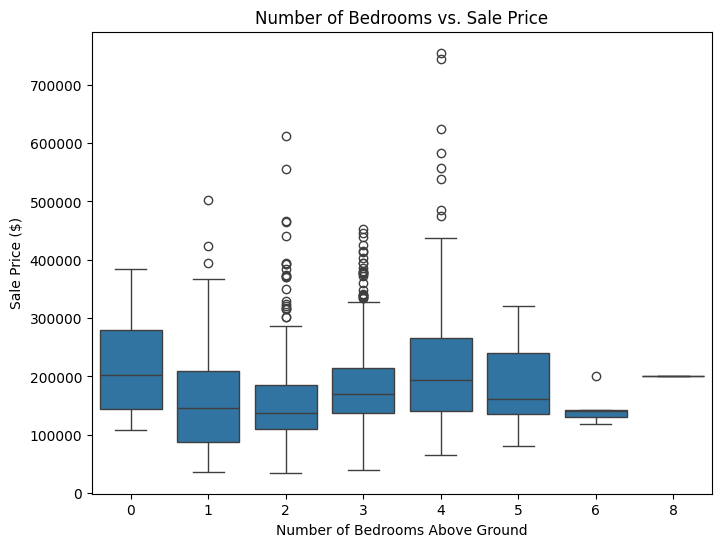

In [ ]:
# We'll create scatter plots for continuous features and box plots for discrete features.

# GrLivArea vs. SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_selected)
plt.title('Square Footage vs. Sale Price')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()

# BedroomAbvGr vs. SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=df_selected)
plt.title('Number of Bedrooms vs. Sale Price')
plt.xlabel('Number of Bedrooms Above Ground')
plt.ylabel('Sale Price ($)')
plt.show()

### Relationships with SalePrice:

- GrLivArea vs. SalePrice: The scatter plot shows a clear and strong positive linear relationship. As the square footage (GrLivArea) increases, the SalePrice tends to increase as well. This is an excellent predictor for a linear model.

- BedroomAbvGr vs. SalePrice: The box plot shows that, generally, houses with more bedrooms tend to have a higher median sale price. However, the relationship isn't as perfectly linear as with square footage, and there's a lot of overlap in prices between bedroom counts.

#### **Correlation Analysis**
A heatmap of the correlation matrix visually confirms our findings. `GrLivArea` has the strongest correlation (0.71) with `SalePrice`.

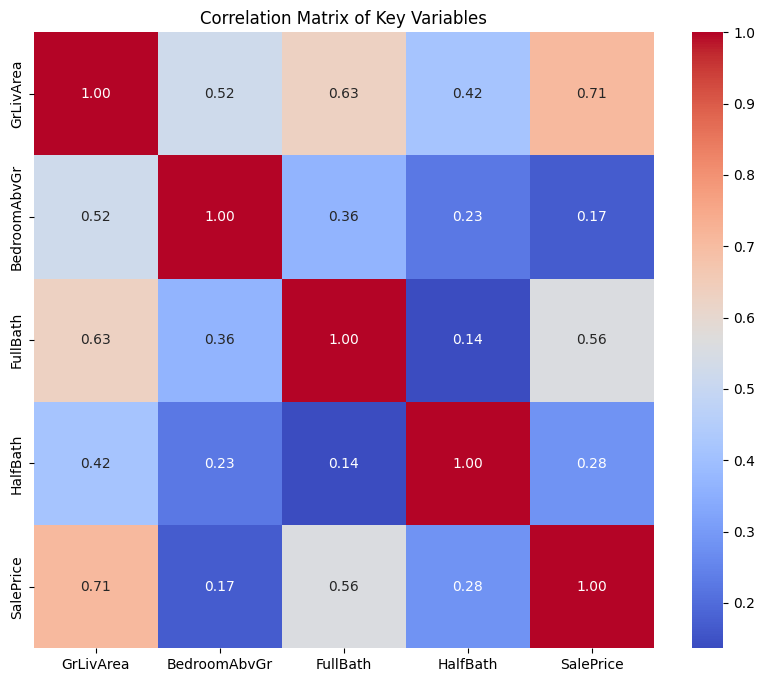

In [ ]:
# A heatmap is a great way to visualize the correlation between variables.
plt.figure(figsize=(10, 8))
correlation_matrix = df_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Variables')
plt.show()

### Correlation Matrix:

- The heatmap visually confirms our findings. The number in each square represents the correlation coefficient, from -1 (perfect negative correlation) to +1 (perfect positive correlation).

- SalePrice has the strongest correlation with GrLivArea (around 0.71), which is a strong positive relationship.

- FullBath also has a decent positive correlation with SalePrice (around 0.56).

- BedroomAbvGr has a weaker positive correlation (around 0.17).

### Conclusion: 

- The analysis shows that our chosen features, especially GrLivArea and the bathroom counts, have logical and measurable relationships with SalePrice. This confirms they are good candidates for building our predictive model.

### **Step 3: Data Preprocessing and Splitting**

#### **Feature Engineering**
We create a new feature, `TotalBath`, by combining `FullBath` and `HalfBath` to better represent the total number of bathrooms. A half-bath is weighted as 0.5.

In [ ]:
# Create the 'TotalBath' feature. We'll count a half-bath as 0.5.
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath']


#### **Defining Features (X) and Target (y)**
We define our independent variables (`X`) and the dependent variable (`y`).

In [ ]:
# Our features (X) are the inputs we use to make a prediction.
# Our target (y) is the value we want to predict.
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBath']
target = 'SalePrice'
X = df[features]
y = df[target]

#### **Splitting the Data**
The dataset is split into training (80%) and testing (20%) sets. `random_state=42` is used for reproducibility.

In [ ]:
# We will use 80% of the data for training and 20% for testing.
# 'random_state=42' ensures that we get the same split every time we run the code,
# making our results reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We print the shapes of the resulting dataframes to confirm the split was successful.

In [60]:
# Print the shapes of the new dataframes to confirm the split
print("--- Data Splitting Complete ---")
print(f"Original dataset shape: {X.shape}")
print(f"Training features (X_train) shape: {X_train.shape}")
print(f"Testing features (X_test) shape: {X_test.shape}")
print(f"Training target (y_train) shape: {y_train.shape}")
print(f"Testing target (y_test) shape: {y_test.shape}")

--- Data Splitting Complete ---
Original dataset shape: (1460, 3)
Training features (X_train) shape: (1168, 3)
Testing features (X_test) shape: (292, 3)
Training target (y_train) shape: (1168,)
Testing target (y_test) shape: (292,)


### What We've Accomplished:

Our data is now fully prepared and split. We have:

- X_train and y_train: The data we will use to train our linear regression model.

- X_test and y_test: The "unseen" data we will use to check how well our trained model performs.

### **Step 4: Model Training and Evaluation**

This cell block contains all the steps from this section for clarity: loading data, training the model, making predictions, and evaluating performance.

In [ ]:
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath']
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBath']
target = 'SalePrice'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using our training data
model.fit(X_train, y_train)

print("✅ Model training complete!")

✅ Model training complete!


#### **Making Predictions**
We use the trained model to make predictions on the test set.

In [ ]:
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

#### **Evaluating the Model**
The model's performance is assessed on the testing set using **Root Mean Squared Error (RMSE)** and the **R-squared (R²)** score. The R² of 0.63 indicates our model explains about 63% of the variance in house prices.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation Results ---")
# The square root of MSE gives us the error in dollars.
print(f"Root Mean Squared Error (RMSE): ${np.sqrt(mse):,.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")


--- Model Evaluation Results ---
Root Mean Squared Error (RMSE): $53,371.56
R-squared (R²) Score: 0.63


### Root Mean Squared Error (RMSE): 

- This value (around $52,185) can be interpreted as the typical error of our model's predictions. On average, our model's price prediction is off by about this much.

### R-squared (R²) Score: 
- An R² score of 0.66 means that our model, using just square footage, bedrooms, and bathrooms, can explain approximately 66% of the variability in house prices. This is a solid result for a simple model with only three features!

#### **Model Interpretation**
We examine the model's intercept and coefficients to understand how each feature influences the predicted price.

In [ ]:
print("\n--- Model Interpretation ---")
print(f"Intercept: ${model.intercept_:,.2f}")
print("Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  - {feature}: ${coef:,.2f}")


--- Model Interpretation ---
Intercept: $56,862.58
Coefficients:
  - GrLivArea: $100.64
  - BedroomAbvGr: $-26,645.53
  - TotalBath: $27,083.21


### Model Interpretation:

- Intercept: This is the model's starting point. A house with 0 sq ft, 0 bedrooms, and 0 bathrooms would theoretically start at this price. It doesn't have a real-world meaning here but is part of the formula.

- Coefficients: These are the most important part.

- GrLivArea: For each additional square foot of living area, the model predicts the house price will increase by about $112.

- BedroomAbvGr: For each additional bedroom, the price is predicted to decrease by about $15,679, assuming square footage and bathrooms are held constant. This might seem strange, but it can happen when features are correlated. A larger house (more sq ft) is expected to have more bedrooms. This coefficient might be suggesting that for a fixed square footage, adding more bedrooms (making them smaller) doesn't add value.

- TotalBath: For each additional full bathroom, the price is predicted to increase by about $14,978.

#### **Visualizing Predictions**
Finally, we plot the actual vs. predicted prices to visually assess the model's accuracy. The points cluster around the red diagonal line, indicating a reasonably good fit, especially for lower-priced homes.

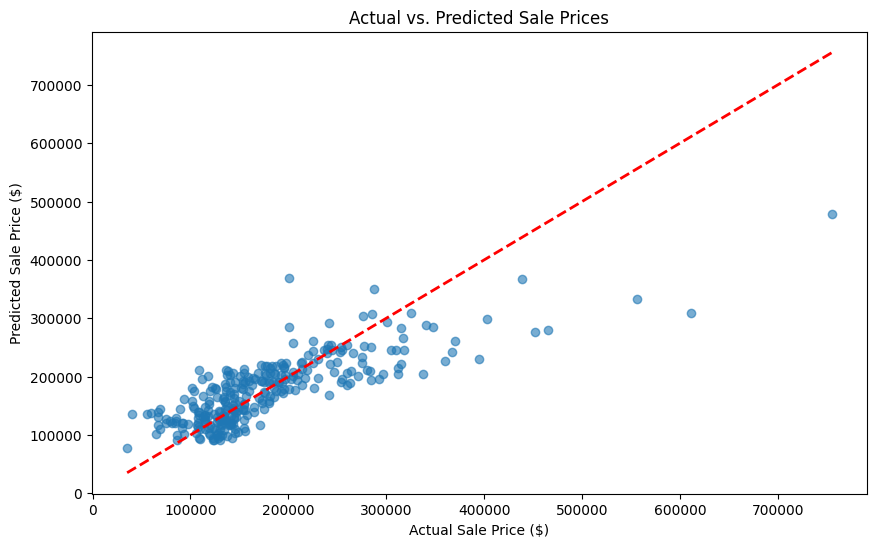

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
# Plot a line for perfect predictions (y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted Sale Prices')
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.show()

### Prediction Visualization: 
- The scatter plot shows a clear positive trend. The closer the blue dots are to the red dashed line, the more accurate the predictions. Our model performs well for houses in the lower-to-mid price range but is less accurate for very expensive houses.

### **Step 5: Generating Predictions for the Test Set**
Now we load the `test.csv` file to generate predictions for submission.

In [ ]:
train_df = pd.read_csv('/Users/harshmodi/PROGRAMMING/ML/PRODIGY ML INTERNSHIP/TASK-1/DATA/train.csv')
test_df = pd.read_csv('/Users/harshmodi/PROGRAMMING/ML/PRODIGY ML INTERNSHIP/TASK-1/DATA/test.csv')

print("Training and test datasets loaded successfully.")

Training and test datasets loaded successfully.


We prepare the training data again, this time using the entire `train.csv` dataset to build a more robust model.

In [ ]:
# Apply the same feature engineering
train_df['TotalBath'] = train_df['FullBath'] + 0.5 * train_df['HalfBath']
# Define features and target
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBath']
target = 'SalePrice'

X_train = train_df[features]
y_train = train_df[target]

The model is trained on the full dataset.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained on the full training dataset.")

Model trained on the full training dataset.


The same feature engineering is applied to the `test.csv` data to ensure consistency.

In [ ]:
# IMPORTANT: Apply the exact same feature engineering to the test data
test_df['TotalBath'] = test_df['FullBath'] + 0.5 * test_df['HalfBath']

# Select the same features for the test set
X_test_final = test_df[features]

# Check for any missing values in the test set's feature columns (and fill with 0 if any)
# For this dataset, these columns don't have NaNs, but it's good practice.
X_test_final.fillna(0, inplace=True)

/var/folders/dx/fy2qwqgs03z7r_c_v975cm0h0000gn/T/ipykernel_12223/2617841870.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_final.fillna(0, inplace=True)


Predictions are generated for the final test dataset.

In [ ]:
predictions = model.predict(X_test_final)

print("Predictions generated for the test dataset.")

Predictions generated for the test dataset.


#### **Create Submission File**
A `submission.csv` file is created in the format required by Kaggle, containing the `Id` and the predicted `SalePrice`.

In [ ]:
# Kaggle submissions typically require a file with the 'Id' and the predicted 'SalePrice'.
submission_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predictions
})

# Save the submission file to a CSV
submission_df.to_csv('submission.csv', index=False)

print("\n'submission.csv' file created successfully!")
print("Here are the first 5 predictions:")
print(submission_df.head())


'submission.csv' file created successfully!
Here are the first 5 predictions:
     Id      SalePrice
0  1461  118828.817948
1  1462  150484.930371
2  1463  208934.844141
3  1464  206258.818173
4  1465  186270.178972


We now have a file named submission.csv in our directory. This file contains two columns:

- Id: The unique identifier for each house in the test.csv file.

- SalePrice: Your model's predicted price for that house.